## Task 2.1

In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

Importing the Data and splitting it. Since the Task explicitly states to use 10 k-Fold. The test Data is never used again.

In [2]:
(X, y) = sklearn.datasets.load_breast_cancer(return_X_y=True)
featureNames = sklearn.datasets.load_breast_cancer().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler().fit(X_train)
X_train = (scaler.transform((X_train)))
scaler = MinMaxScaler().fit(X_test)
X_test = (scaler.transform((X_test)))

A function that calculates the accuracy of a LinearSVC with 10 k-Fold.

In [3]:
def SVM(X_train, y_train):
    cv_results = cross_validate(LinearSVC(),X_train,y_train, cv=10,scoring='accuracy')
    return np.average(cv_results['test_score'])

Functions that finds the name of a feature by comparing its values to a list of the same feature where the names a known. Ideally, this could also be recorded though the loop of the feature selection.

In [4]:
def regainFeatureNames(X_train_new, X_train, featureNames):
    res = []
    for i in range(X_train_new.shape[1]):
        for j in range(X_test.shape[1]):
            if np.array_equal(X_train_new[:, i],X_train[:, j]):
                res.append([j,featureNames[j] ])
    return res
def regainSingleFeatureNames(X_train_new, X_train, featureNames):
    res = []
    for j in range(X_test.shape[1]):
        if np.array_equal(X_train_new,X_train[:, j]):
            res.append([j,featureNames[j] ])
    return res

Function who perform forward and backward steps. They are designed in a way that they calculate the accuracy of every feature combination and return the index an accuacy of the feature which should be added or removed.

In [5]:
def forwardStep(X_forward_train_old,  X_forward_train_new,  y_train):
    bestIndex = 0
    bestAcc = 0
    for i in range(X_forward_train_old.shape[1]):
        #adding an feature
        currentX_train = np.append(X_forward_train_new, X_forward_train_old[:, i].reshape(len(X_forward_train_old), 1), axis = 1)
        #calculating accuracy
        acc = (SVM(currentX_train, y_train))
        if acc>bestAcc:
            bestIndex = i
            bestAcc = acc
    return[bestIndex, bestAcc] 

def backwardStep(X_forward_train_old, y_train):
    bestIndex = 0
    bestAcc = 0
    for i in range(X_forward_train_old.shape[1]):
        #removing a feature
        currentX_train = np.delete(X_forward_train_old, i, axis = 1)
        #calculating accuracy
        acc = (SVM(currentX_train, y_train,))
        if acc>bestAcc:
            bestIndex = i
            bestAcc = acc
    return[bestIndex, bestAcc]  
    



Gready forward Feature Selection gets performed. In the first step, the feature with the best stand-alone performance will be calculated and saved in X_forward_train_new. In the next Step, a loop tries out which of the leftover features can be added to increase the accuracy the most. This feature also gets added to X_forward_train_new. <br>
after all the features are added the function regainFeatureNames is called to determine the names of the features in the new list. 

Iteration  Number - [featureNumber, acc] - shape of current X_train
1   [27, 0.9071153846153847]  (398, 1)
2   [20, 0.9372435897435898]  (398, 2)
3   [19, 0.9648076923076923]  (398, 3)
4   [23, 0.9697435897435897]  (398, 4)
5   [10, 0.9748076923076923]  (398, 5)
6   [6, 0.9748076923076923]  (398, 6)
7   [20, 0.9748076923076923]  (398, 7)
8   [22, 0.9748076923076923]  (398, 8)
9   [15, 0.9748076923076923]  (398, 9)
10   [6, 0.9748076923076923]  (398, 10)
11   [5, 0.9748717948717948]  (398, 11)
12   [0, 0.9773717948717948]  (398, 12)
13   [11, 0.9773717948717948]  (398, 13)
14   [1, 0.9773717948717948]  (398, 14)
15   [1, 0.9773717948717948]  (398, 15)
16   [5, 0.9748076923076923]  (398, 16)
17   [5, 0.9748717948717948]  (398, 17)
18   [5, 0.9748717948717948]  (398, 18)
19   [7, 0.9773717948717948]  (398, 19)
20   [5, 0.9773717948717948]  (398, 20)
21   [5, 0.9773717948717948]  (398, 21)
22   [5, 0.9773717948717948]  (398, 22)
23   [2, 0.9773717948717948]  (398, 23)
24   [1, 0.9773717948

<function matplotlib.pyplot.show(close=None, block=None)>

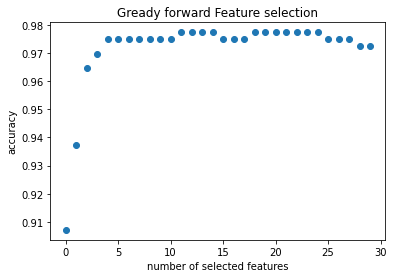

In [6]:
X_forward_train_old = X_train
bestIndex = 0
bestAcc = 0

#finding the feature with the best stand-alone performance
for i in range(X_forward_train_old.shape[1]):
    currentX_train = X_forward_train_old[:, i].reshape(len(X_forward_train_old), 1)
    acc = (SVM(currentX_train, y_train))
    if acc>bestAcc:
        bestIndex = i
        bestAcc = acc
allAcc = []
allAcc.append(bestAcc)
X_forward_train_new = X_forward_train_old[:, bestIndex].reshape(len(X_forward_train_old), 1)
X_forward_train_old = np.delete(X_forward_train_old, bestIndex, 1)
print("Iteration  Number - [featureNumber, acc] - shape of current X_train")
print(str(1)+"   " + "[27, "+str(bestAcc)+ "]  "+ str(X_forward_train_new.shape))

#adding the best feature to the model until all the features are added
for i in range(X_forward_train_old.shape[1]):
    res = (forwardStep(X_forward_train_old, X_forward_train_new,  y_train))
    allAcc.append(res[1])
    bestIndex =  res[0]
    X_forward_train_new = np.append(X_forward_train_new, X_forward_train_old[:, bestIndex].reshape(len(X_forward_train_new), 1),axis = 1 )
    X_forward_train_old = np.delete(X_forward_train_old, bestIndex, 1)
    print(str(i +2)+"   " + str(res)+ "  "+ str(X_forward_train_new.shape))

print("order of the features: ")
for i in (regainFeatureNames(X_forward_train_new, X_train, featureNames)):
    print(i)
    

plt.plot(allAcc,  "o")
plt.title('Gready forward Feature selection')
plt.xlabel('number of selected features')
plt.ylabel('accuracy')
plt.show


## Subtask 2: Backward Greedy Feature Selection

Gready Backward Feature Selection gets preformed. In the first step, the feature which can be removed with the least loss of performance will be calculated and removed from X_forward_train_old. In the next Step, a loop tries out which of the leftover feature can be removed least loss of performance.
The name of each removed feature gets saved to be displayed in the end. 

Iteration Number - [featureNumber, acc] - shape of current X_train
1   [28, 0.9774358974358973]  (398, 29)
0   [20, 0.9775]  (398, 28)
1   [5, 0.9800000000000001]  (398, 27)
2   [0, 0.9800000000000001]  (398, 26)
3   [1, 0.9800000000000001]  (398, 25)
4   [1, 0.9800000000000001]  (398, 24)
5   [1, 0.9800000000000001]  (398, 23)
6   [1, 0.9800000000000001]  (398, 22)
7   [2, 0.9800000000000001]  (398, 21)
8   [3, 0.9800000000000001]  (398, 20)
9   [3, 0.9800000000000001]  (398, 19)
10   [3, 0.9800000000000001]  (398, 18)
11   [2, 0.9800000000000001]  (398, 17)
12   [3, 0.9800000000000001]  (398, 16)
13   [4, 0.9800000000000001]  (398, 15)
14   [4, 0.9800000000000001]  (398, 14)
15   [2, 0.9800000000000001]  (398, 13)
16   [2, 0.9800000000000001]  (398, 12)
17   [2, 0.9799358974358974]  (398, 11)
18   [3, 0.9799358974358974]  (398, 10)
19   [1, 0.9800000000000001]  (398, 9)
20   [4, 0.9774358974358975]  (398, 8)
21   [2, 0.9749358974358975]  (398, 7)
22   [5, 0.9699358974358974]  (398, 6

<function matplotlib.pyplot.show(close=None, block=None)>

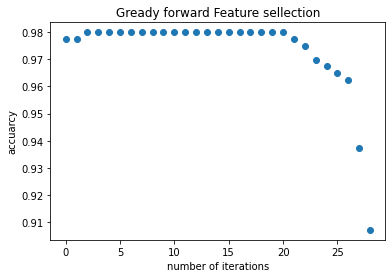

In [7]:
X_forward_train_old = X_train
names = []
bestIndex = 0
bestAcc = 0

#finding the first feature which can be removed with the least loss of performance
for i in range(X_forward_train_old.shape[1]):
    currentX_train = np.delete(X_forward_train_old, i, axis = 1)
    acc = (SVM(currentX_train, y_train))
    if acc>bestAcc:
        bestIndex = i
        bestAcc = acc

allAcc = []
allAcc.append(bestAcc)
names.append(regainSingleFeatureNames(X_forward_train_old[:,bestIndex], X_train, featureNames))
X_forward_train_old = np.delete(X_forward_train_old, bestIndex, 1)
print("Iteration Number - [featureNumber, acc] - shape of current X_train")
print(str(1)+"   " + "[28, "+str(bestAcc)+ "]  "+ str(X_forward_train_old.shape))

for i in range(X_forward_train_old.shape[1]-1):
    res = (backwardStep(X_forward_train_old, y_train))
    allAcc.append(res[1])
    bestIndex =  res[0]
    names.append(regainSingleFeatureNames(X_forward_train_old[:,bestIndex], X_train, featureNames))
    X_forward_train_old = np.delete(X_forward_train_old, bestIndex, 1)
    print(str(i)+"   " + str(res)+ "  "+ str(X_forward_train_old.shape))


    
print("order of the features: ")
for i in names:
    print(i)    
    

plt.plot(allAcc,  "o")
plt.title('Gready forward Feature sellection')
plt.xlabel('number of iterations')
plt.ylabel('accuarcy')
plt.show


## Subtask 3: Feature Importance

Which features would you select using forward and backward feature selection? <br>
With backward feature selection I would select the following features: ([Feature Number, Name]) <br>
[23, 'worst area']<br>
[28, 'worst symmetry']<br>
[29, 'worst fractal dimension']<br>
[26, 'worst concavity']<br>
[24, 'worst smoothness']<br>
[1, 'mean texture']<br>
[20, 'worst radius']<br><br><br>
With forward feature selection I would select the following features: ([Feature Number, Name]) <br>
[7, 'mean concave points']]<br>
[21, 'worst texture']<br>
[20, 'worst radius']<br>
[26, 'worst concavity']<br>
[11, 'texture error']<br>
[6, 'mean concavity']<br><br><br>


Do the features differ and if so, why?<br>
They differ in every feature but 20 and 27 "worst concave points". That indicates that many feature dependencies can be recognized in backward feature selection but not in forward feature selection. 